In [1]:
import pandas as pd 
import numpy as np
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

# To be used for missing value imputation
from sklearn.impute import SimpleImputer

# To help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    AdaBoostClassifier,
    GradientBoostingClassifier,
    RandomForestClassifier,
    BaggingClassifier,
)
from xgboost import XGBClassifier
import lightgbm as lgb

from sklearn.dummy import DummyClassifier

# To get different metric scores, and split data
from sklearn import metrics
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    ConfusionMatrixDisplay,
    confusion_matrix,
    roc_auc_score,
    RocCurveDisplay,
    classification_report,
    # plot_roc_curve,
)

# To use in feature selection
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel

# To be used for data scaling and encoding
from sklearn.preprocessing import StandardScaler, PowerTransformer, RobustScaler

# To be used for tuning the model
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin


# To oversample and undersample data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# set the background for the graphs
plt.style.use("ggplot")


# To supress warnings
import warnings

# date time
import time
from datetime import datetime

In [2]:
import pyarrow.parquet as pq
path = 'Data/Prob1/raw_train.parquet'
df = pq.read_table(source=path).to_pandas()

## Describe

In [3]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
feature1,134201,481,"Therapist, speech and language",1026,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature2,134201,14,grocery_pos,14217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
feature3,134201.000,NaN,NaN,NaN,98.995,205.882,1.000,9.900,48.590,90.840,15861.400
feature4,134201.000,NaN,NaN,NaN,50721.259,29578.182,1106.000,28152.000,46222.000,78045.000,99791.000
feature5,134201.000,NaN,NaN,NaN,37.237,5.720,11.873,33.368,37.492,41.133,76.846
feature6,134201.000,NaN,NaN,NaN,-91.839,16.339,-173.220,-98.893,-87.142,-79.599,-63.066
feature7,134201.000,NaN,NaN,NaN,293853.951,552713.290,194.000,16719.000,62009.000,247530.000,2906700.000
feature8,134201.000,NaN,NaN,NaN,37.235,5.385,18.798,33.603,37.545,40.976,71.485
feature9,134201.000,NaN,NaN,NaN,-91.845,16.224,-169.020,-98.069,-86.946,-80.010,-69.134
feature10,134201.000,NaN,NaN,NaN,48.273,16.670,23.448,34.950,44.952,58.639,97.121


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134201 entries, 0 to 134200
Data columns (total 17 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   feature1   134201 non-null  object 
 1   feature2   134201 non-null  object 
 2   feature3   134201 non-null  float64
 3   feature4   134201 non-null  int64  
 4   feature5   134201 non-null  float64
 5   feature6   134201 non-null  float64
 6   feature7   134201 non-null  int64  
 7   feature8   134201 non-null  float64
 8   feature9   134201 non-null  float64
 9   feature10  134201 non-null  float64
 10  feature11  134201 non-null  int64  
 11  feature12  134201 non-null  int64  
 12  feature13  134201 non-null  int64  
 13  label      134201 non-null  int64  
 14  feature14  134201 non-null  float64
 15  feature15  134201 non-null  float64
 16  feature16  134201 non-null  float64
dtypes: float64(9), int64(6), object(2)
memory usage: 17.4+ MB


In [5]:
def category_unique_value():
    for col in df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list():
        print("Unique values and corresponding data counts for feature: " + col)
        print("Nunique value:", df[col].nunique())
        print("-" * 90)
#         df_temp = pd.concat(
#             [
#                 df[col].value_counts(),                          
#                 df[col].value_counts(normalize=True) * 100,
#             ],
#             axis=1,
#         )
#         df_temp.columns = ["Count", "Percentage"]
#         print(df_temp)
#         print("-" * 90, '\n'*2)

category_unique_value()

Unique values and corresponding data counts for feature: feature3
Nunique value: 28125
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature4
Nunique value: 893
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature5
Nunique value: 134201
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature6
Nunique value: 134201
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature7
Nunique value: 739
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature8
Nunique value: 133688
------------------------

In [6]:
def category_unique_value():
    for col in df.select_dtypes(include='object').columns.unique().to_list():
        print("Unique values and corresponding data counts for feature: " + col)
        print("Nunique value:", df[col].nunique())
        print("-" * 90)
#         df_temp = pd.concat(
#             [
#                 df[col].value_counts(),                          
#                 df[col].value_counts(normalize=True) * 100,
#             ],
#             axis=1,
#         )
#         df_temp.columns = ["Count", "Percentage"]
#         print(df_temp)
#         print("-" * 90, '\n'*2)

category_unique_value()

Unique values and corresponding data counts for feature: feature1
Nunique value: 481
------------------------------------------------------------------------------------------
Unique values and corresponding data counts for feature: feature2
Nunique value: 14
------------------------------------------------------------------------------------------


<AxesSubplot:>

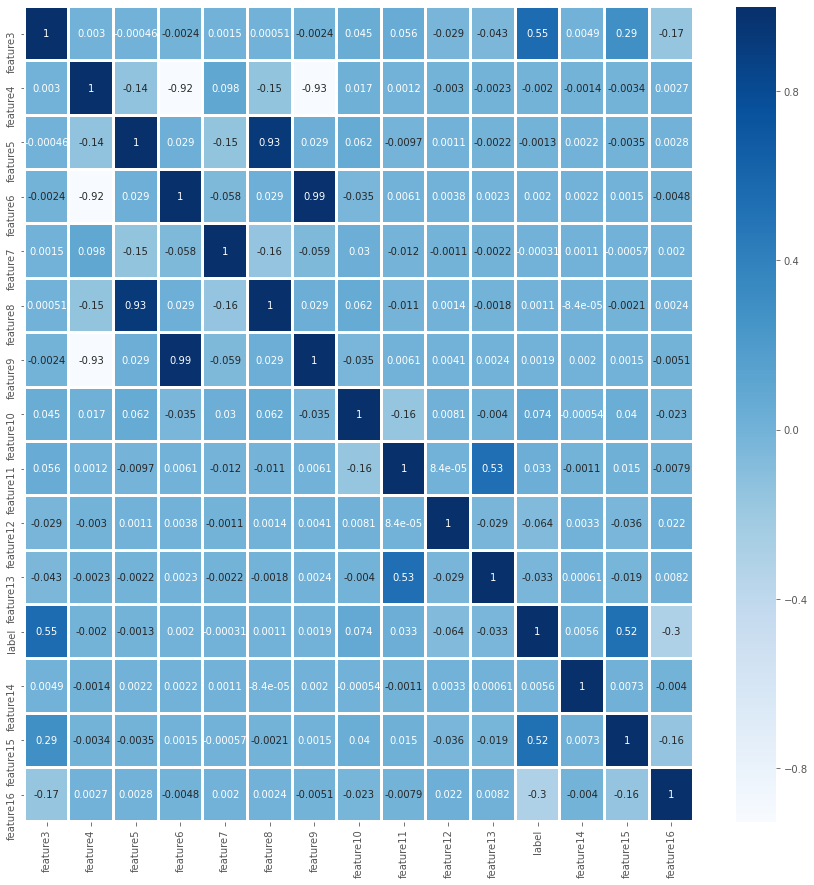

In [7]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

corrmat = df.corr()
top_corr_features = corrmat.index

plt.figure(figsize=(15, 15))

#plot heat map
sns.heatmap(df[top_corr_features].corr(),annot=True, cmap="Blues", linewidths=2, linecolor='white')


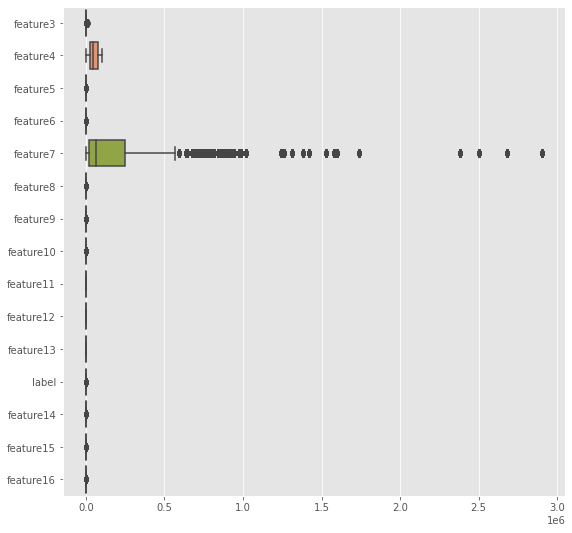

In [8]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(9, 9))
numeric_columns = df.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list()
sns.boxplot(data=df[numeric_columns], orient='h')
plt.show()

In [9]:
# Random state and loss
seed = 2023
loss_func = "logloss"

# Test and Validation sizes
test_size = 0.15
val_size = 0.15

# Dependent Varibale Value map
# target_mapper = {"fraud": 1, "not_fraud": 0}


# Splitting the dataset into dependent and independent variable sets
# X,y = data.drop(columns=["label"]),  data["label"].map(target_mapper)
X, y = df.drop('label', axis=1),  df["label"]

# Splitting data into training, validation and test set

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=test_size, random_state=seed, stratify=y
)

# then we split the temporary set into train and validation
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=val_size, random_state=seed, stratify=y_temp
)
print(
    "Training data shape:\n",
    X_train.shape,
    "\nValidation Data Shape:\n",
    X_val.shape,
    "\nTesting Data Shape:\n",
    X_test.shape,
)

Training data shape:
 (96959, 16) 
Validation Data Shape:
 (17111, 16) 
Testing Data Shape:
 (20131, 16)


## Data preprocessing

In [10]:
# To be used for creating pipelines and personalizing them
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.base import TransformerMixin

# Building a function to standardize columns

def feature_name_standardize(df: pd.DataFrame):
    df_ = df.copy()
    df_.columns = [i.replace(" ", "_").lower() for i in df_.columns]
    return df_

# Building a function to drop features

def drop_feature(df: pd.DataFrame, features: list = []):
    df_ = df.copy()
    if len(features) != 0:
        df_ = df_.drop(columns=features)
        
    return df_

# Building a function to treat incorrect value

def mask_value(df: pd.DataFrame, feature: str = None, value_to_mask: str = None, masked_value: str = None):
    df_ = df.copy()
    if feature != None and value_to_mask != None:
        if feature in df_.columns:
            df_[feature] = df_[feature].astype('object')
            df_.loc[df_[df_[feature] == value_to_mask].index, feature] = masked_value
            df_[feature] = df_[feature].astype('category')
            
    return df_

# Building a custom imputer

def impute_category_unknown(df: pd.DataFrame, fill_value: str):
    df_ = df.copy()
    for col in df_.select_dtypes(include='category').columns.tolist():
        df_[col] = df_[col].astype('object')
        df_[col] = df_[col].fillna('Unknown')
        df_[col] = df_[col].astype('category')
    return df_

# Building a custom data preprocessing class with fit and transform methods for standardizing column names

class FeatureNamesStandardizer(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Returns dataframe with column names in lower case with underscores in place of spaces."""
        X_ = feature_name_standardize(X)
        return X_
    
    
# Building a custom data preprocessing class with fit and transform methods for dropping columns

class ColumnDropper(TransformerMixin):
    def __init__(self, features: list):
        self.features = features

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Given a list of columns, returns a dataframe without those columns."""
        X_ = drop_feature(X, features=self.features)
        return X_
        
    

# Building a custom data preprocessing class with fit and transform methods for custom value masking

class CustomValueMasker(TransformerMixin):
    def __init__(self, feature: str, value_to_mask: str, masked_value: str):
        self.feature = feature
        self.value_to_mask = value_to_mask
        self.masked_value = masked_value

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = mask_value(X, self.feature, self.value_to_mask, self.masked_value)
        return X_
    
    
# Building a custom class to one-hot encode using pandas
class PandasOneHot(TransformerMixin):
    def __init__(self, columns: list = None):
        self.columns = columns

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = pd.get_dummies(X, columns = self.columns, drop_first=True)
        return X_
    
# Building a custom class to fill nulls with Unknown
class FillUnknown(TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        """All SciKit-Learn compatible transformers and classifiers have the
        same interface. `fit` always returns the same object."""
        return self

    def transform(self, X):
        """Return a dataframe with the required feature value masked as required."""
        X_ = impute_category_unknown(X, fill_value='Unknown')
        return X_

### Standardize feature names

In [11]:
feature_name_standardizer = FeatureNamesStandardizer()

X_train = feature_name_standardizer.fit_transform(X_train)
X_val = feature_name_standardizer.transform(X_val)
X_test = feature_name_standardizer.transform(X_test)

### Impute categorical Nulls to Unknown

In [12]:
cat_columns = X_train.select_dtypes(include="category").columns.tolist()
imputer = FillUnknown()

X_train[cat_columns] = imputer.fit_transform(X_train[cat_columns])
X_val[cat_columns] = imputer.transform(X_val[cat_columns])
X_test[cat_columns] = imputer.transform(X_test[cat_columns])

In [13]:
# Select columns with dtype 'float, int'
num_cols_name = X_train.select_dtypes(include=['float64', 'int64']).columns.to_list()

# Print the selected columns
print(num_cols_name)

['feature3', 'feature4', 'feature5', 'feature6', 'feature7', 'feature8', 'feature9', 'feature10', 'feature11', 'feature12', 'feature13', 'feature14', 'feature15', 'feature16']


In [14]:
# Select columns with dtype 'object'
obj_cols_name = X_train.select_dtypes(include='object').columns.to_list()

# Print the selected columns
print(obj_cols_name)

['feature1', 'feature2']


In [15]:
X_train.head(8)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
66484,Retail banker,misc_pos,1.700,48095,44.397,-81.501,22934,42.678,-82.686,47.535,10,0,1,1.247,0.512,57.199
87236,Travel agency manager,home,29.310,28054,31.551,-82.608,102620,36.020,-80.683,38.773,22,3,2,7.854,0.789,68.440
12457,"Engineer, materials",health_fitness,56.650,28602,38.645,-79.700,79007,34.863,-81.633,90.241,15,4,2,6.553,0.717,64.785
39584,Product designer,shopping_pos,134.510,80220,37.355,-102.187,990452,38.739,-105.387,60.922,6,4,1,10.729,0.425,74.850
44147,Charity fundraiser,grocery_pos,5.880,27519,35.530,-80.584,131592,35.219,-78.575,74.637,9,4,1,10.630,0.230,66.032
101233,Chief Operating Officer,gas_transport,49.520,2863,41.115,-66.595,19385,42.570,-71.899,37.907,8,0,1,9.816,0.492,70.359
62274,Editorial assistant,home,10.520,97530,39.378,-127.949,6916,41.477,-122.290,32.130,13,6,2,6.260,0.519,74.133
75989,Audiological scientist,personal_care,187.020,94025,40.844,-123.839,40526,38.309,-122.792,79.826,19,3,2,8.216,0.308,71.773


### Category Encoder

In [16]:
import category_encoders as ce

In [17]:
cols = obj_cols_name + ['feature11', 'feature12', 'feature13']

# Create an instance of the TargetEncoder
encoder = ce.TargetEncoder(cols=cols)

# Fit and transform the data
X_train = encoder.fit_transform(X_train, y_train)
X_val = encoder.transform(X_val)
X_test = encoder.transform(X_test)

In [18]:
X_train.head(8)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
66484,0.052,0.034,1.700,48095,44.397,-81.501,22934,42.678,-82.686,47.535,0.011,0.076,0.070,1.247,0.512,57.199
87236,0.040,0.017,29.310,28054,31.551,-82.608,102620,36.020,-80.683,38.773,0.243,0.075,0.058,7.854,0.789,68.440
12457,0.095,0.022,56.650,28602,38.645,-79.700,79007,34.863,-81.633,90.241,0.013,0.059,0.058,6.553,0.717,64.785
39584,0.102,0.077,134.510,80220,37.355,-102.187,990452,38.739,-105.387,60.922,0.013,0.059,0.070,10.729,0.425,74.850
44147,0.052,0.132,5.880,27519,35.530,-80.584,131592,35.219,-78.575,74.637,0.012,0.059,0.070,10.630,0.230,66.032
101233,0.020,0.064,49.520,2863,41.115,-66.595,19385,42.570,-71.899,37.907,0.014,0.076,0.070,9.816,0.492,70.359
62274,0.051,0.017,10.520,97530,39.378,-127.949,6916,41.477,-122.290,32.130,0.017,0.042,0.058,6.260,0.519,74.133
75989,0.071,0.026,187.020,94025,40.844,-123.839,40526,38.309,-122.792,79.826,0.013,0.075,0.058,8.216,0.308,71.773


### Scale the numerical columns

In [19]:
for col in num_cols_name:
    if col in ['feature11', 'feature12', 'feature13']:
        continue
    sc = RobustScaler(with_centering=False, with_scaling=True)
#     sc = PowerTransformer()
    scale_train = sc.fit_transform(X_train[col].values.reshape(-1, 1))
    scale_test = sc.transform(X_test[col].values.reshape(-1, 1))
    scale_val = sc.transform(X_val[col].values.reshape(-1, 1))
    
    # Assign the scaled data back
    X_train.loc[:, col] = scale_train.flatten()
    X_test.loc[:, col] = scale_test.flatten()
    X_val.loc[:, col] = scale_val.flatten()

In [20]:
print(
    "Training data shape: \n\n",
    X_train.shape,
    "\n\nValidation Data Shape: \n\n",
    X_val.shape,
    "\n\nTesting Data Shape: \n\n",
    X_test.shape,
)

Training data shape: 

 (96959, 16) 

Validation Data Shape: 

 (17111, 16) 

Testing Data Shape: 

 (20131, 16)


In [21]:
X_train.head(8)

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,feature13,feature14,feature15,feature16
66484,0.052,0.034,0.021,0.967,5.724,-4.248,0.099,5.789,-4.590,2.011,0.011,0.076,0.070,0.461,1.759,8.164
87236,0.040,0.017,0.362,0.564,4.068,-4.306,0.445,4.886,-4.479,1.641,0.243,0.075,0.058,2.904,2.711,9.768
12457,0.095,0.022,0.699,0.575,4.982,-4.154,0.342,4.729,-4.532,3.818,0.013,0.059,0.058,2.423,2.462,9.247
39584,0.102,0.077,1.661,1.612,4.816,-5.326,4.291,5.255,-5.851,2.578,0.013,0.059,0.070,3.967,1.461,10.683
44147,0.052,0.132,0.073,0.553,4.581,-4.200,0.570,4.777,-4.362,3.158,0.012,0.059,0.070,3.930,0.792,9.425
101233,0.020,0.064,0.611,0.058,5.301,-3.471,0.084,5.774,-3.991,1.604,0.014,0.076,0.070,3.629,1.690,10.042
62274,0.051,0.017,0.130,1.960,5.077,-6.669,0.030,5.626,-6.789,1.359,0.017,0.042,0.058,2.314,1.784,10.581
75989,0.071,0.026,2.309,1.890,5.266,-6.455,0.176,5.196,-6.817,3.378,0.013,0.075,0.058,3.038,1.058,10.244


## Correlation

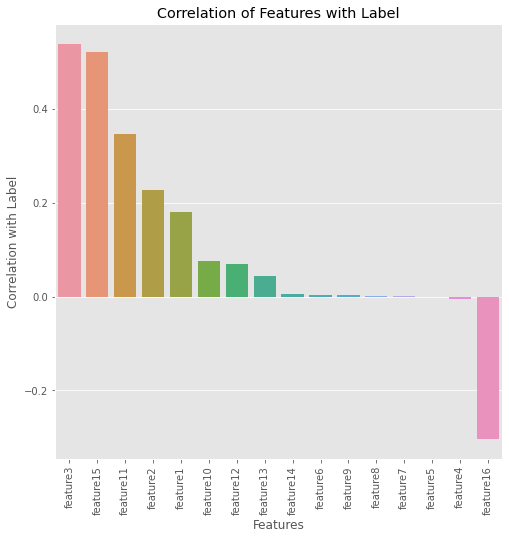

In [22]:
df_train = pd.concat([X_train, y_train], axis=1)

correlation_label = df_train.corr()['label']
correlation_label = correlation_label.drop('label').sort_values(ascending=False)

plt.figure(figsize=(8, 8))
sns.barplot(x=correlation_label.index, y=correlation_label.values)
plt.xlabel('Features')
plt.ylabel('Correlation with Label')
plt.title('Correlation of Features with Label')
plt.xticks(rotation=90)
plt.show()

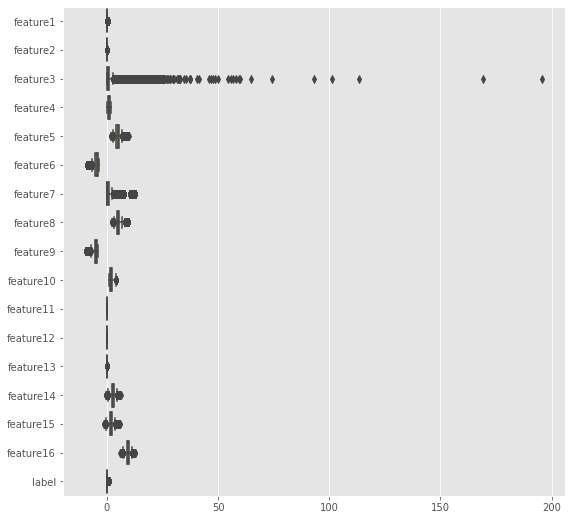

In [23]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(9, 9))
numeric_columns = df_train.select_dtypes(include=[np.int64, np.float64]).columns.unique().to_list()
sns.boxplot(data=df_train[numeric_columns], orient='h')
plt.show()

## Label

([<matplotlib.patches.Wedge at 0x7f7d8864b588>,
 [Text(-1.0783105048955823, 0.2173624968384249, '0'),
  Text(1.078310520158789, -0.217362421119388, '1')],
 [Text(-0.5881693663066813, 0.11856136191186811, ' 93.67%\n 125704'),
  Text(0.5881693746320666, -0.11856132061057525, ' 6.33%\n 8497')])

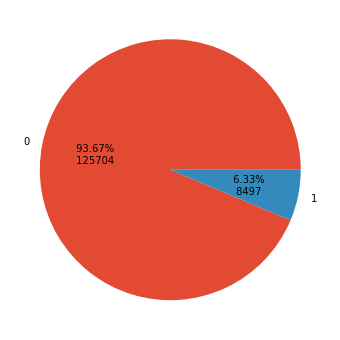

In [24]:
total = df['label'].value_counts().sum()
def fmt(x):
    return f'{x: .2f}%\n{total * x / 100: .0f}'

plt.figure(figsize=(6, 6))
plt.pie(df['label'].value_counts().values, labels=df['label'].value_counts().index, autopct=fmt)

## Oversampling and Undersampling train data using SMOTE, RandomUnderSampler to deal with imbalance dataset.

In [25]:
def oversampling_data():
  sm = SMOTE(
      sampling_strategy="minority", k_neighbors=10, random_state=seed
  )  # Synthetic Minority Over Sampling Technique
  return sm

X_train_over, y_train_over = oversampling_data().fit_resample(X_train, y_train)
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over == 1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over == 0)))


print("After UpSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After UpSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before UpSampling, counts of label 'Yes': 6139
Before UpSampling, counts of label 'No': 90820 

After UpSampling, counts of label 'Yes': 90820
After UpSampling, counts of label 'No': 90820 

After UpSampling, the shape of train_X: (181640, 16)
After UpSampling, the shape of train_y: (181640,) 



In [26]:
def undersampling_data():
    rus = RandomUnderSampler(random_state=1)
    return rus


X_train_un, y_train_un = undersampling_data().fit_resample(X_train, y_train)

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 6139
Before Under Sampling, counts of label 'No': 90820 

After Under Sampling, counts of label 'Yes': 6139
After Under Sampling, counts of label 'No': 6139 

After Under Sampling, the shape of train_X: (12278, 16)
After Under Sampling, the shape of train_y: (12278,) 



## Feature Selection

In [27]:
# Feature Selection
lgbm = lgb.LGBMClassifier(random_state=seed)
lgbm = lgbm.fit(X_train, y_train)
model = SelectFromModel(lgbm, prefit=True)
X_lgbm = model.transform(X_train_over)
print(X_lgbm.shape)
print(lgbm.feature_importances_)

(181640, 6)
[183 265 667  50  66  63 109  63  49 204 236  94 163  94 373 321]


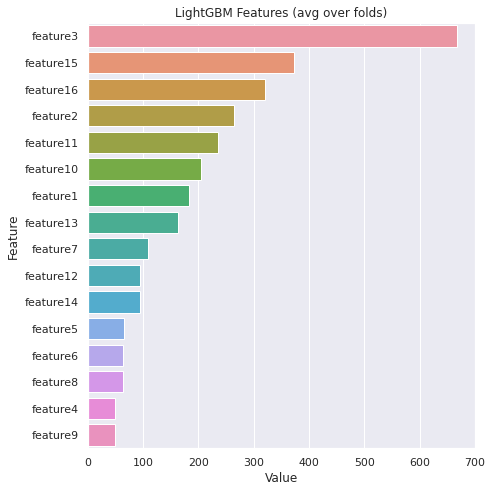

In [28]:
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':lgbm.feature_importances_,'Feature': X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

plotImp(lgbm, X_train_un)

(12278, 5)
[159 190 713  40 103  62 110  74  36 177 256  92  89 101 407 391]


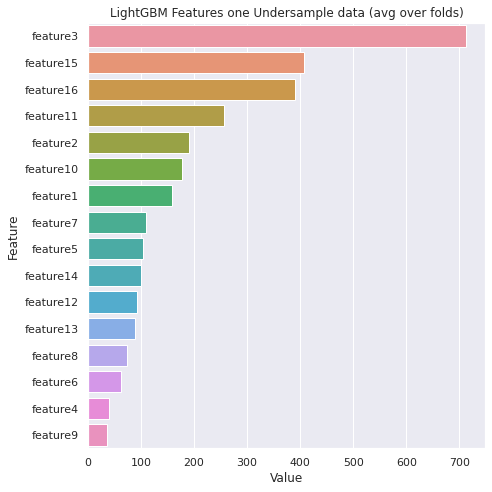

In [29]:
lgbm = lgb.LGBMClassifier(random_state=seed)
lgbm_un = lgbm.fit(X_train_un, y_train_un)
model = SelectFromModel(lgbm, prefit=True)
X_lgbm = model.transform(X_train_un)
print(X_lgbm.shape)
print(lgbm.feature_importances_)

def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':lgbm_un.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features one Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances_undersample-02.png')
    plt.show()

plotImp(lgbm_un, X_train_un)

In [30]:
# AdaBoostClassifier
adb = AdaBoostClassifier(random_state=seed)
adb_un = adb.fit(X_train_un,y_train_un)
model = SelectFromModel(adb_un, prefit=True)
X_adb = model.transform(X_train_un)
print(X_adb.shape)


# XGBClassifier
xgb = XGBClassifier(random_state=seed, eval_metric=loss_func)
xgb_un = xgb.fit(X_train_un,y_train_un)
model = SelectFromModel(xgb_un, prefit=True)
X_xgb = model.transform(X_train_un)
print(X_xgb.shape)

(12278, 3)
(12278, 3)


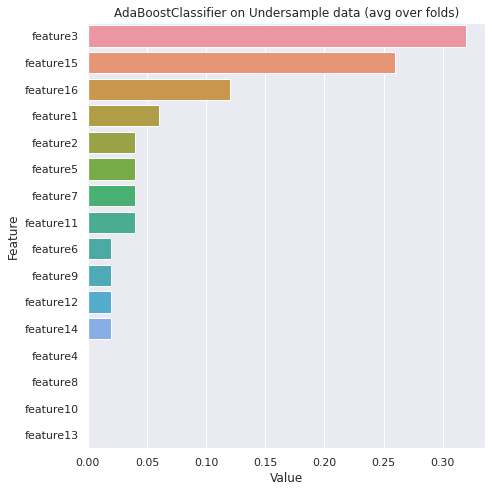

In [31]:
def plotImp(model, X , num = 16, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value':adb_un.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('AdaBoostClassifier on Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('adb_importances_undersample-03.png')
    plt.show()

plotImp(adb_un, X_train_un)

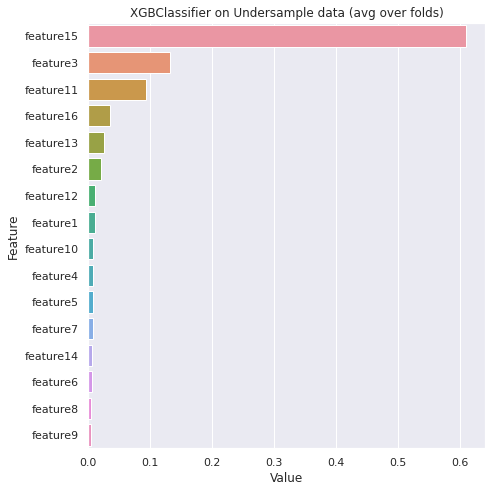

In [32]:
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value': xgb_un.feature_importances_,'Feature': X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('XGBClassifier on Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('xgb_importances_undersample-04.png')
    plt.show()

plotImp(xgb_un, X_train_un)

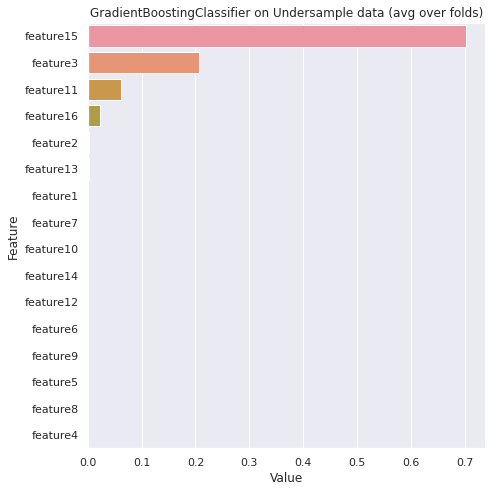

In [33]:
#GradientBoostingClassifier
gbm = GradientBoostingClassifier(random_state=seed)
gbm_un = gbm.fit(X_train_un, y_train_un)
model = SelectFromModel(gbm_un, prefit=True)
X_gbm = model.transform(X_train_un)
X_gbm.shape
def plotImp(model, X , num = 20, fig_size = (7, 7)):
    feature_imp = pd.DataFrame({'Value': gbm_un.feature_importances_,'Feature': X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                        ascending=False)[0:num])
    plt.title('GradientBoostingClassifier on Undersample data (avg over folds)')
    plt.tight_layout()
    plt.savefig('gbm_importances_undersample-05.png')
    plt.show()

plotImp(gbm_un, X_train_un)

In [34]:
from sklearn.model_selection import cross_validate
def cross_validation(model, _X, _y, _cv=5):
    '''Function to perform 5 Folds Cross-Validation
    Parameters
    ----------
    model: Python Class, default=None
      This is the machine learning algorithm to be used for training.
    _X: array
    This is the matrix of features.
    _y: array
    This is the target variable.
    _cv: int, default=5
    Determines the number of folds for cross-validation.
    Returns
    -------
    The function returns a dictionary containing the metrics 'accuracy', 'precision',
    'recall', 'f1' for both training set and validation set.
    '''

    _scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
    results = cross_validate(estimator=model,
                       X=_X,
                       y=_y,
                       cv=_cv,
                       scoring=_scoring,
                       return_train_score=True)

    return {"Training Accuracy scores": results['train_accuracy'],
      "Mean Training Accuracy": results['train_accuracy'].mean()*100,
      "Training Precision scores": results['train_precision'],
      "Mean Training Precision": results['train_precision'].mean(),
      "Training Recall scores": results['train_recall'],
      "Mean Training Recall": results['train_recall'].mean(),
      "Training F1 scores": results['train_f1'],
      "Mean Training F1 Score": results['train_f1'].mean(),
      "Training ROC-AUC": results['train_roc_auc'],
      "Mean Training ROC-AUC": results['train_roc_auc'].mean(),
      "Validation Accuracy scores": results['test_accuracy'],
      "Mean Validation Accuracy": results['test_accuracy'].mean()*100,
      "Validation Precision scores": results['test_precision'],
      "Mean Validation Precision": results['test_precision'].mean(),
      "Validation Recall scores": results['test_recall'],
      "Mean Validation Recall": results['test_recall'].mean(),
      "Validation F1 scores": results['test_f1'],
      "Mean Validation F1 Score": results['test_f1'].mean(),
      "Validation ROC-AUC": results['test_roc_auc'],
      "Mean Validation ROC-AUC": results['test_roc_auc'].mean()
      }

In [35]:
X_train, X_test, X_val = X_train.values, X_test.values, X_val.values
X_train_over, y_train_over = X_train_over.values, y_train_over.values
X_train_un, y_train_un = X_train_un.values, y_train_un.values

In [36]:
LGBM_result = cross_validation(lgbm, X_train, y_train)
LGBM_result

{'Training Accuracy scores': array([0.99874947, 0.99864633, 0.99862055, 0.99846584, 0.99860767]),
 'Mean Training Accuracy': 99.86179725716524,
 'Training Precision scores': array([0.99243044, 0.99121014, 0.99180999, 0.99118491, 0.99040425]),
 'Mean Training Precision': 0.9914079462382738,
 'Training Recall scores': array([0.98778253, 0.98737528, 0.98635716, 0.98452454, 0.98758143]),
 'Mean Training Recall': 0.9867241872761869,
 'Training F1 scores': array([0.99010103, 0.98928899, 0.98907606, 0.9878435 , 0.98899083]),
 'Mean Training F1 Score': 0.9890600813176785,
 'Training ROC-AUC': array([0.999978  , 0.99997707, 0.99997341, 0.99997259, 0.99997195]),
 'Mean Training ROC-AUC': 0.9999746018875431,
 'Validation Accuracy scores': array([0.99360561, 0.99422442, 0.99319307, 0.99401815, 0.99350214]),
 'Mean Validation Accuracy': 99.37086788587062,
 'Validation Precision scores': array([0.95619835, 0.96039604, 0.9499179 , 0.96410684, 0.97011102]),
 'Mean Validation Precision': 0.960146029174

In [37]:
y_pred = lgbm.predict(X_test)
# Ket qua lan 1
cm = confusion_matrix(y_test, y_pred)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.9806765684764791
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     18856
           1       0.77      0.98      0.87      1275

    accuracy                           0.98     20131
   macro avg       0.89      0.98      0.93     20131
weighted avg       0.98      0.98      0.98     20131



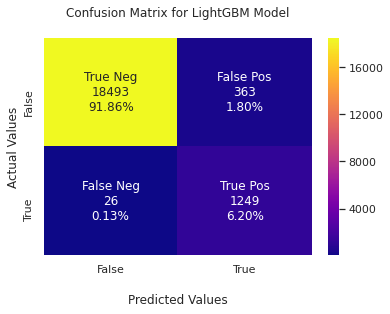

In [38]:
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')

ax.set_title('Confusion Matrix for LightGBM Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [39]:
## Undersampling test, val data
X_test_un, y_test_un = undersampling_data().fit_resample(X_test, y_test)
X_val_un, y_val_un = undersampling_data().fit_resample(X_val, y_val)

In [40]:
LGBM_result_un = cross_validation(lgbm_un, X_train_un, y_train_un)
LGBM_result_un

{'Training Accuracy scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Accuracy': 100.0,
 'Training Precision scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Precision': 1.0,
 'Training Recall scores': array([1., 1., 1., 1., 1.]),
 'Mean Training Recall': 1.0,
 'Training F1 scores': array([1., 1., 1., 1., 1.]),
 'Mean Training F1 Score': 1.0,
 'Training ROC-AUC': array([1., 1., 1., 1., 1.]),
 'Mean Training ROC-AUC': 1.0,
 'Validation Accuracy scores': array([0.98412052, 0.98330619, 0.98208469, 0.98370672, 0.97881874]),
 'Mean Validation Accuracy': 98.24073717799877,
 'Validation Precision scores': array([0.9829407 , 0.98291294, 0.98051948, 0.98607699, 0.98039216]),
 'Mean Validation Precision': 0.9825684518851314,
 'Validation Recall scores': array([0.98534202, 0.98371336, 0.98371336, 0.98125509, 0.9771987 ]),
 'Mean Validation Recall': 0.9822445040869259,
 'Validation F1 scores': array([0.98413989, 0.98331298, 0.98211382, 0.98366013, 0.97879282]),
 'Mean Validation F1 Score'

In [41]:
# Ket qua lan 2
y_pred_un = lgbm_un.predict(X_test_un)
cm = confusion_matrix(y_test_un, y_pred_un)
print(accuracy_score(y_test_un, y_pred_un))
print(classification_report(y_test_un, y_pred_un))

0.9776470588235294
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1275
           1       0.98      0.98      0.98      1275

    accuracy                           0.98      2550
   macro avg       0.98      0.98      0.98      2550
weighted avg       0.98      0.98      0.98      2550



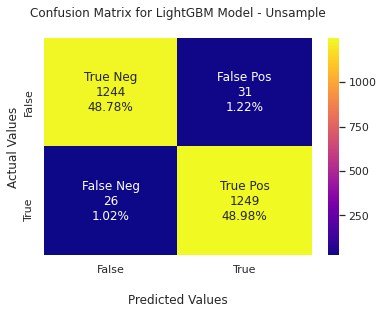

In [42]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')

ax.set_title('Confusion Matrix for LightGBM Model - Unsample\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False', 'True'])
ax.yaxis.set_ticklabels(['False', 'True'])

## Display the visualization of the Confusion Matrix.
plt.show()

## Fine Tuning

### Use Optuna to tune the model

In [43]:
import optuna

pipeline = Pipeline(steps=[('model', lgbm)])

def objective(trial):
    params = {
        'model__num_leaves': trial.suggest_int('model__num_leaves', 50, 100),
        'model__min_data_in_leaf': trial.suggest_int('model__min_data_in_leaf', 100, 1000),
        'model__max_depth': trial.suggest_int('model__max_depth', 4, 10),
        'model__learning_ratet': trial.suggest_float('model__learning_rate', 0.01, 0.1),
        'model__num_iterations': trial.suggest_int('model__num_iterations', 3, 20),
    }
    pipeline.set_params(**params)
    pipeline.fit(X_train, y_train)
    predictions = pipeline.predict(X_test)
    return accuracy_score(y_test, predictions)

optuna.logging.set_verbosity(optuna.logging.WARNING)
study = optuna.create_study(study_name='churn model',
                            direction='maximize')
study.optimize(objective, n_trials=200, show_progress_bar=True)

[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=857, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=857
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=793, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=793
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=156, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=156
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=291, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=291
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=260, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=260
[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=663, 

In [44]:
print('Best parameters', study.best_params)
print('Best score', study.best_value)
print('Best model', study.best_trial)

Best parameters {'model__num_leaves': 51, 'model__min_data_in_leaf': 129, 'model__max_depth': 10, 'model__learning_rate': 0.0647620215798624, 'model__num_iterations': 20}
Best score 0.9914559634394715
Best model FrozenTrial(number=181, values=[0.9914559634394715], datetime_start=datetime.datetime(2023, 6, 24, 14, 5, 47, 453991), datetime_complete=datetime.datetime(2023, 6, 24, 14, 5, 47, 935479), params={'model__num_leaves': 51, 'model__min_data_in_leaf': 129, 'model__max_depth': 10, 'model__learning_rate': 0.0647620215798624, 'model__num_iterations': 20}, distributions={'model__num_leaves': IntDistribution(high=100, log=False, low=50, step=1), 'model__min_data_in_leaf': IntDistribution(high=1000, log=False, low=100, step=1), 'model__max_depth': IntDistribution(high=10, log=False, low=4, step=1), 'model__learning_rate': FloatDistribution(high=0.1, log=False, low=0.01, step=None), 'model__num_iterations': IntDistribution(high=20, log=False, low=3, step=1)}, user_attrs={}, system_attrs={

### Re-fit the model using the best parameters

In [45]:
pipeline.set_params(**study.best_params)
pipeline.fit(X_train, y_train)
predictions = pipeline.predict(X_test)
cm = confusion_matrix(y_test, predictions)

print('Accuracy: ', accuracy_score(y_test, predictions))
print('AUC: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=129, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=129
Accuracy:  0.9900650737668273
AUC:  0.9350973113046661
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     18856
           1       0.97      0.87      0.92      1275

    accuracy                           0.99     20131
   macro avg       0.98      0.94      0.96     20131
weighted avg       0.99      0.99      0.99     20131



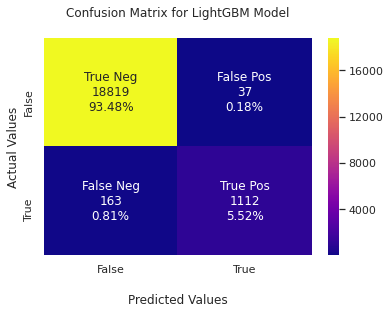

In [46]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')

ax.set_title('Confusion Matrix for LightGBM Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

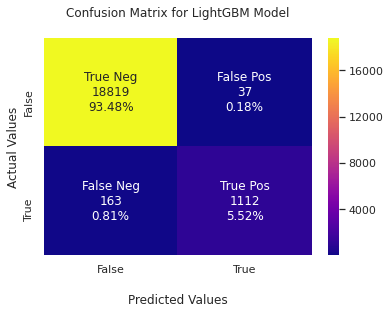

In [47]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')

ax.set_title('Confusion Matrix for LightGBM Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [48]:
pipeline.set_params(**study.best_params)
pipeline.fit(X_train_un, y_train_un)
pipeline_predictions = pipeline.predict(X_test_un)
cm = confusion_matrix(y_test_un, pipeline_predictions)
print('Accuracy:', accuracy_score(y_test_un, pipeline_predictions))
print('AUC:', roc_auc_score(y_test_un, pipeline_predictions))
print(classification_report(y_test_un, pipeline_predictions))

[LightGBM] [Warning] Unknown parameter: learning_ratet
[LightGBM] [Warning] min_data_in_leaf is set=129, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=129
Accuracy: 0.9701960784313726
AUC: 0.9701960784313726
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1275
           1       0.97      0.97      0.97      1275

    accuracy                           0.97      2550
   macro avg       0.97      0.97      0.97      2550
weighted avg       0.97      0.97      0.97      2550



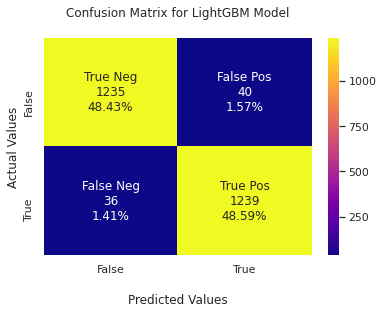

In [49]:
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']

group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(cm, annot=labels, fmt='', cmap='plasma')

ax.set_title('Confusion Matrix for LightGBM Model\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()